In [1]:
import os
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import random
from random import choice
import pylab as plt
from matplotlib import pyplot as plt

In [2]:
os.chdir("C:\\Users\\alex\\Desktop\\Project 9- Virtual world Data Analysis\\dataverse_files\\csv")

In [3]:
y=pd.read_csv('campaigns.csv',sep=";",nrows=4981,engine='python',names=[0,1,2,3],usecols=(0,1,2,3))

In [4]:
y=y[4711:4982]

In [5]:
G=nx.from_pandas_dataframe(y,source=2, target=3,edge_attr=True,create_using=nx.DiGraph())

In [6]:
G1=nx.from_pandas_dataframe(y,source=2, target=3,edge_attr=True)

In [9]:
G1.order()

270

In [10]:
s = pd.Series(pd.date_range('2012-01-30 14:44:00','2012-07-02 13:33:00',freq='20D'))

In [11]:
s[7]

Timestamp('2012-06-18 14:44:00')

In [12]:
y[1]=y[1].as_matrix()

In [13]:
y[1]= pd.to_datetime(y[1])

In [14]:
Time=[]
for i in range(7):
    Time.append(y.loc[(y[1]>=s[i])&(y[1]<s[i+1])])

In [15]:
X=[]
for i in range(7):
    X.append(nx.from_pandas_dataframe(Time[i],source=2, target=3,edge_attr=True,create_using=nx.DiGraph()))

In [16]:
X1=[]
for i in range(7):
    X1.append(nx.from_pandas_dataframe(Time[i],2,3))

In [17]:
for i in range(7):
    print(X[i].order(),X[i].size())

246 246
4 2
9 6
16 13
4 2
0 0
0 0


In [18]:
Y=[]
for node in G:
    d = G.out_degree(node)
    if (d>1):
        Y.append([node,d])
L=[]
Y=sorted(Y, key=lambda x: x[1], reverse=True)
Y=Y[:100]
print(Y)
for u in [p[0] for p in Y]:
    L.append(u)
print("\nUsers who were most active in campaign 5: ")
print(L)

[[21212, 20], [21343, 18], [21121, 15], [21135, 11], [21186, 11], [21153, 9], [21272, 8], [21223, 8], [21334, 6], [21174, 6], [21184, 5], [21209, 4], [21305, 4], [21178, 4], [21291, 4], [21151, 4], [21204, 4], [21143, 4], [21266, 4], [21127, 4], [21131, 4], [21328, 3], [21331, 3], [21333, 3], [21233, 3], [21308, 3], [21250, 3], [21275, 3], [21123, 3], [21234, 3], [21207, 3], [21119, 3], [21142, 3], [21164, 3], [21312, 2], [21243, 2], [21196, 2], [21245, 2], [21294, 2], [21176, 2], [21187, 2], [21254, 2], [21256, 2], [21229, 2], [21226, 2], [21263, 2], [21218, 2]]

Users who were most active in campaign 5: 
[21212, 21343, 21121, 21135, 21186, 21153, 21272, 21223, 21334, 21174, 21184, 21209, 21305, 21178, 21291, 21151, 21204, 21143, 21266, 21127, 21131, 21328, 21331, 21333, 21233, 21308, 21250, 21275, 21123, 21234, 21207, 21119, 21142, 21164, 21312, 21243, 21196, 21245, 21294, 21176, 21187, 21254, 21256, 21229, 21226, 21263, 21218]


In [21]:
F=[]
for i in range(7):
    Y=[] 
    for node in X[i]: 
        d = X[i].degree(node)
        Y.append([node,d])
    F.append(Y)

In [22]:
s=s.apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))

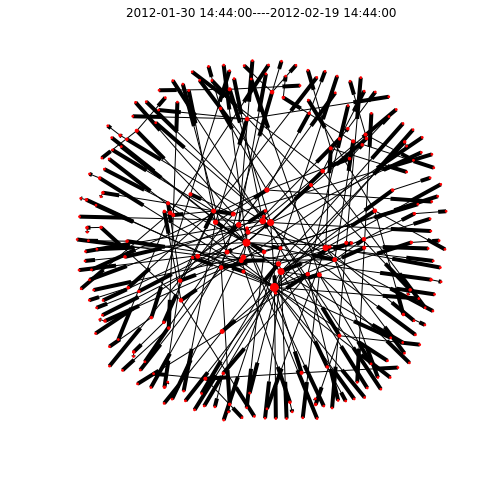

Number of nodes in graph: 246
Diameter: 18
Radius: 9


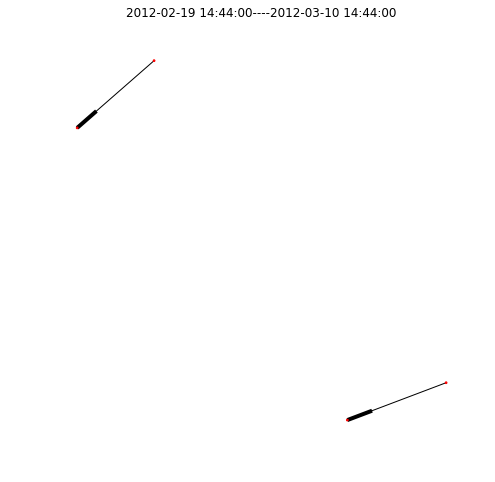

Number of nodes in graph: 4


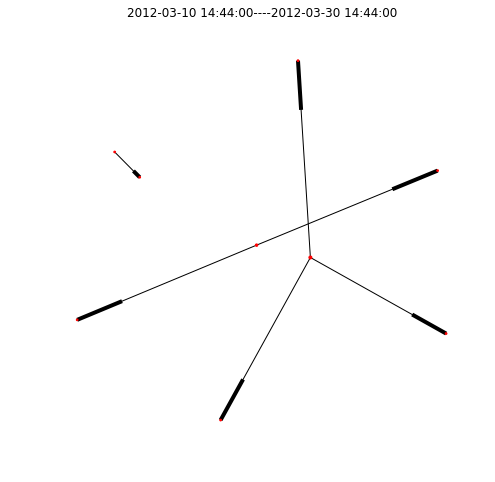

Number of nodes in graph: 9


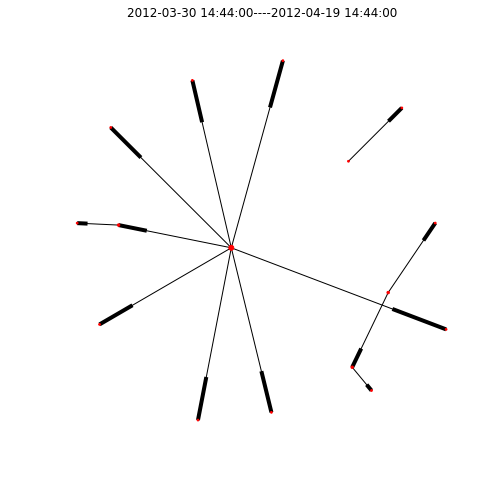

Number of nodes in graph: 16


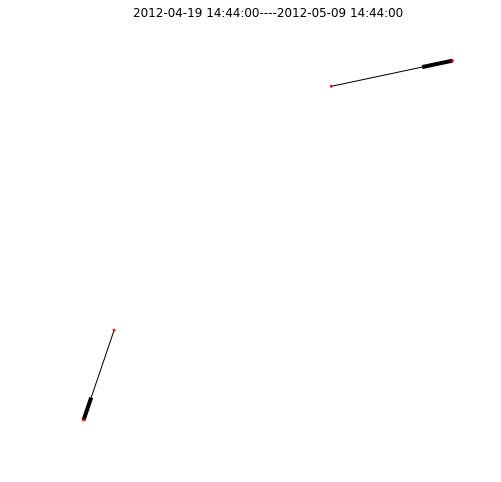

Number of nodes in graph: 4

On the interval >2012-05-09 14:44:00----2012-05-29 14:44:00< we dont have active campaign!!

On the interval >2012-05-29 14:44:00----2012-06-18 14:44:00< we dont have active campaign!!


In [24]:
S=[]
d=[]
r=[]
for i in range(7):
    V= G.subgraph(X[i])
    if(V.order()==0):
        print("\nOn the interval >"+s[i]+"----"+s[i+1]+"< we dont have active campaign!!") 
    else:
        V= G.subgraph(X[i])
        deg=nx.degree(V)
        pos = nx.spring_layout(V)
        plt.figure(1,figsize=(8,8)) 
        nx.draw_networkx_edges(V,pos, edge_color='k',arrows=True)           
        nx.draw_networkx_nodes(V, pos,nodelist=[p[0] for p in F[i]],node_size=[v * 3 for v in [p[1] for p in F[i]]],node_color='r')
        plt.title(s[i]+'----'+s[i+1])
        plt.axis('off')
        plt.show()
        print("Number of nodes in graph: %d" %V.order())
        S.append(max(nx.connected_component_subgraphs(X1[i]),key=len))
        if(i==0):
            d.append(nx.diameter(S[i]))
            print("Diameter:", d[i])
            r.append(nx.radius(S[i]))                         
            print("Radius:", r[i])

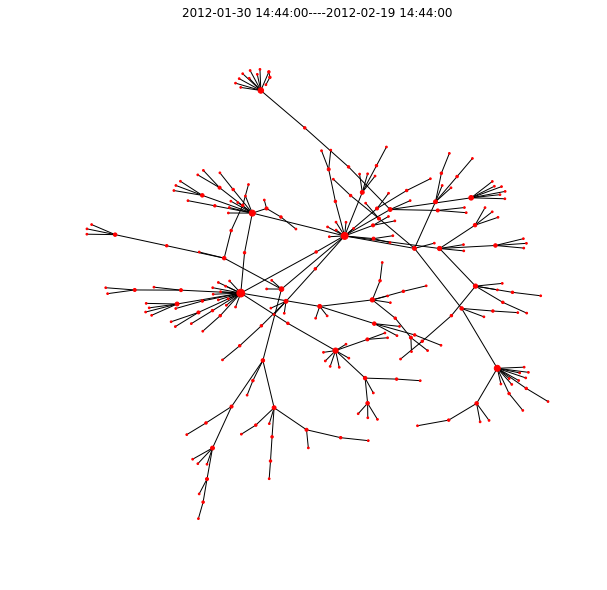

Number of nodes in graph: 246
Diameter: 18
Radius: 9


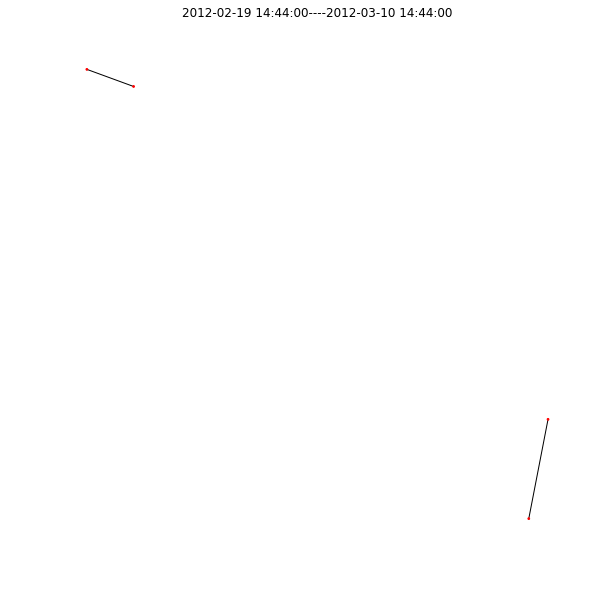

Number of nodes in graph: 4


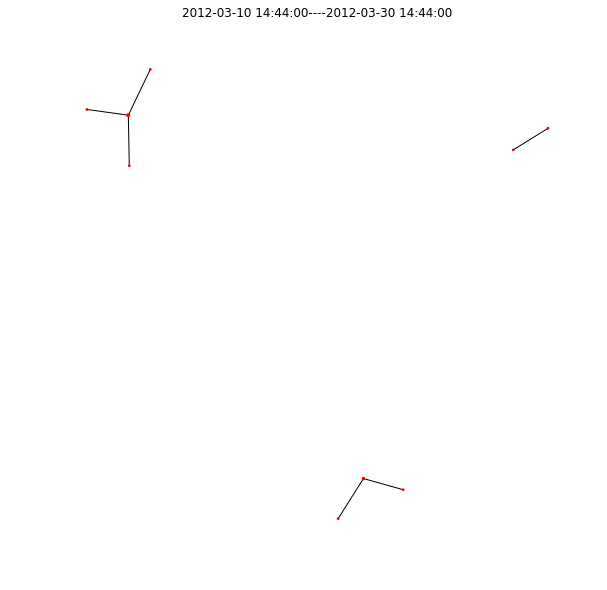

Number of nodes in graph: 9


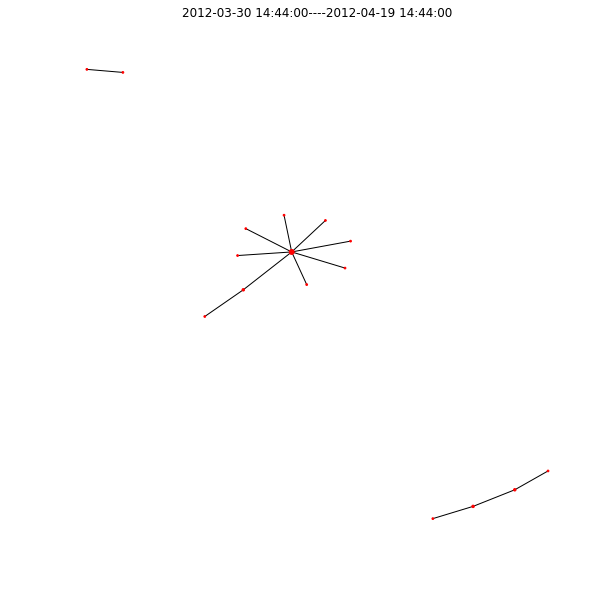

Number of nodes in graph: 16


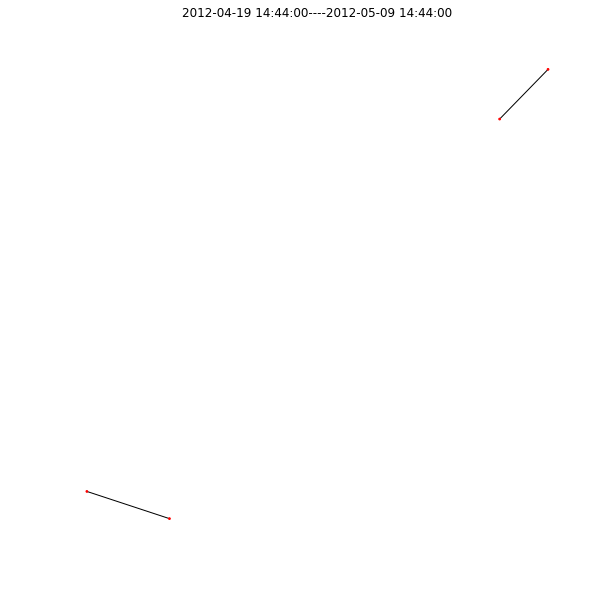

Number of nodes in graph: 4

On the interval >2012-05-09 14:44:00----2012-05-29 14:44:00< we dont have active campaign!!

On the interval >2012-05-29 14:44:00----2012-06-18 14:44:00< we dont have active campaign!!


In [25]:
S=[]
d=[]
r=[]
for i in range(7):
    V= G1.subgraph(X[i])
    if(V.order()==0):
        print("\nOn the interval >"+s[i]+"----"+s[i+1]+"< we dont have active campaign!!") 
    else:
        V= G1.subgraph(X[i])
        deg=nx.degree(V)
        pos = nx.spring_layout(V)
        plt.figure(1,figsize=(10,10)) 
        nx.draw_networkx_edges(V,pos, edge_color='k',arrows=True)           
        nx.draw_networkx_nodes(V, pos,nodelist=[p[0] for p in F[i]],node_size=[v * 3 for v in [p[1] for p in F[i]]],node_color='r')
        plt.title(s[i]+'----'+s[i+1])
        plt.axis('off')
        plt.show()
        print("Number of nodes in graph: %d" %V.order())
        S.append(max(nx.connected_component_subgraphs(X1[i]),key=len))
        if(i==0):
            d.append(nx.diameter(S[i]))
            print("Diameter:", d[i])
            r.append(nx.radius(S[i]))                         
            print("Radius:", r[i])

In [26]:
Y=[]
for node in X[0]:
    d = X[0].out_degree(node)
    if (d>1):
        Y.append([node,d])
L=[]
Y=sorted(Y, key=lambda x: x[1], reverse=True)
Y=Y[:20]
print(Y)
for u in [p[0] for p in Y]:
    L.append(u)
print("\nUsers most active in campaign 5: ")
print(len(L))

[[21212, 19], [21121, 15], [21135, 11], [21186, 11], [21153, 9], [21223, 8], [21334, 6], [21343, 6], [21272, 5], [21184, 5], [21174, 5], [21209, 4], [21305, 4], [21178, 4], [21151, 4], [21204, 4], [21143, 4], [21266, 4], [21127, 4], [21131, 4]]

Users most active in campaign 5: 
20


In [27]:
D=[]
L.append(21334)
for i in L:
    for j in L:
        if(i!=j):
            if(i not in D):
                D.append(i)
            if(j not in D):
                D.append(j)
            if(nx.has_path(X[0],i,j)==True):
                for k in nx.shortest_path(X[0],i,j):
                    if(k not in D):
                        D.append(k)
            else:
                continue            
print(len(D))
print(D)

29
[21212, 21121, 21135, 21186, 21153, 21285, 21266, 21217, 21162, 21223, 21303, 21334, 21343, 21272, 21184, 21174, 21204, 21209, 21305, 21178, 21151, 21143, 21127, 21131, 21322, 21207, 21170, 21331, 21312]


In [28]:
V2= G1.subgraph(D)

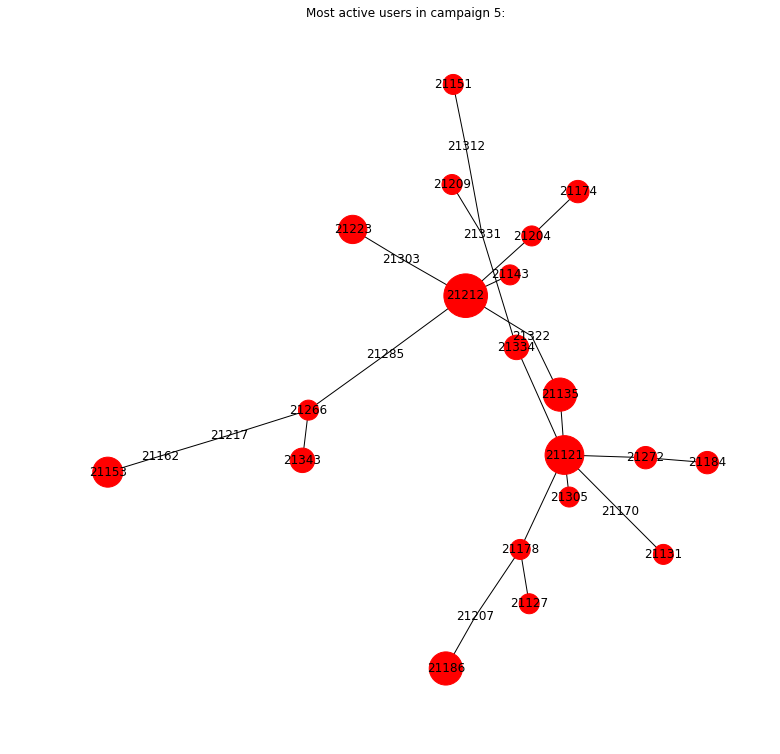

In [29]:
pos = nx.spring_layout(V2)
plt.figure(1,figsize=(13,13))     
nx.draw_networkx_edges(V2,pos, edge_color='k',arrows=True)
nx.draw_networkx_nodes(V2, pos,nodelist=[p[0] for p in Y],node_size=[v * 100 for v in [p[1] for p in Y]],node_color='r')
nx.draw_networkx_labels(V2,pos,with_labels=True)
plt.axis('off')
plt.title("Most active users in campaign 5: ")
plt.show()

In [30]:
s1 = pd.Series(pd.date_range('2012-01-30 14:44:00','2012-02-14 14:44:00',freq='1D'))

In [31]:
s1[10]

Timestamp('2012-02-09 14:44:00')

In [32]:
y[1]=y[1].as_matrix()
y[1]= pd.to_datetime(y[1])
s1=s1.apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))

In [33]:
Time2=[]
for i in range(10):
    Time2.append(y.loc[(y[1]>=s1[i])&(y[1]<=s1[i+1])])
X2=[]
for i in range(10):
    X2.append(nx.from_pandas_dataframe(Time2[i],source=2, target=3,edge_attr=True,create_using=nx.DiGraph())) 
for i in range(10):
    print(X2[i].order(),X2[i].size())

124 124
30 19
37 27
36 26
46 30
14 8
0 0
2 1
2 1
0 0


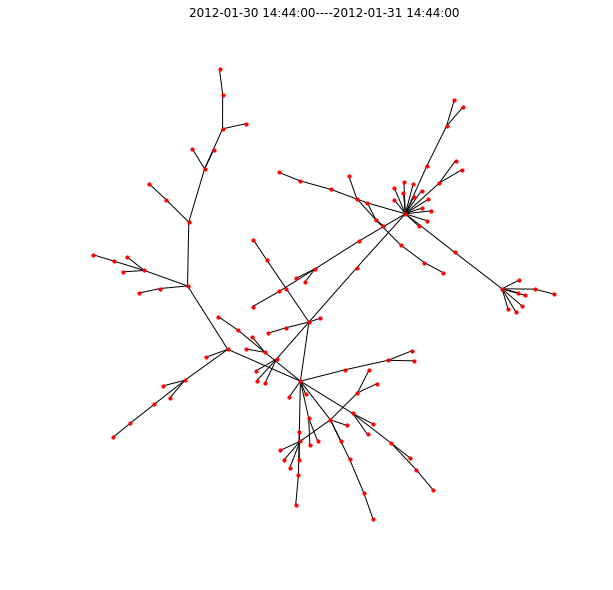

Number of nodes in graph: 124
Diameter: 15
Radius: 8


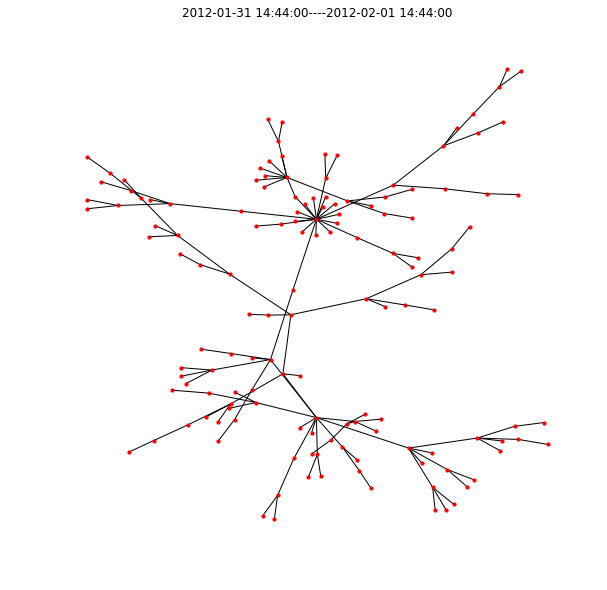

Number of nodes in graph: 143
Diameter: 15
Radius: 8


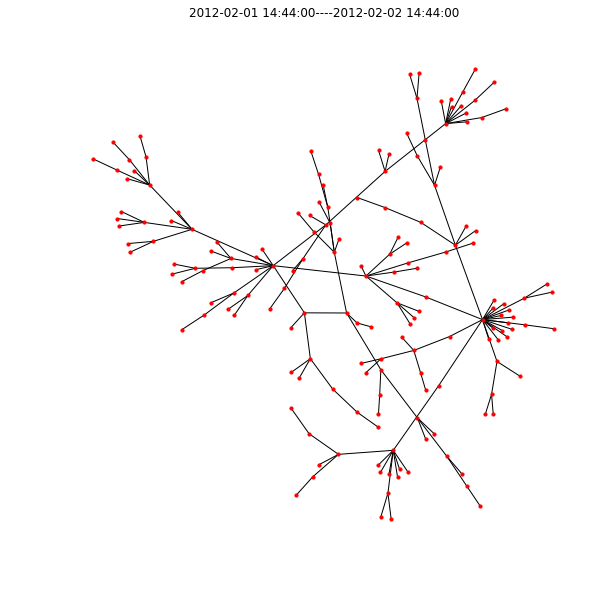

Number of nodes in graph: 170
Diameter: 15
Radius: 8


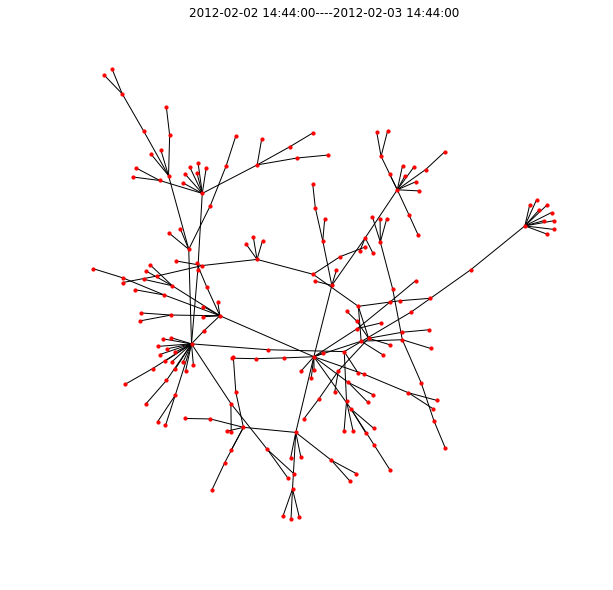

Number of nodes in graph: 196
Diameter: 16
Radius: 8


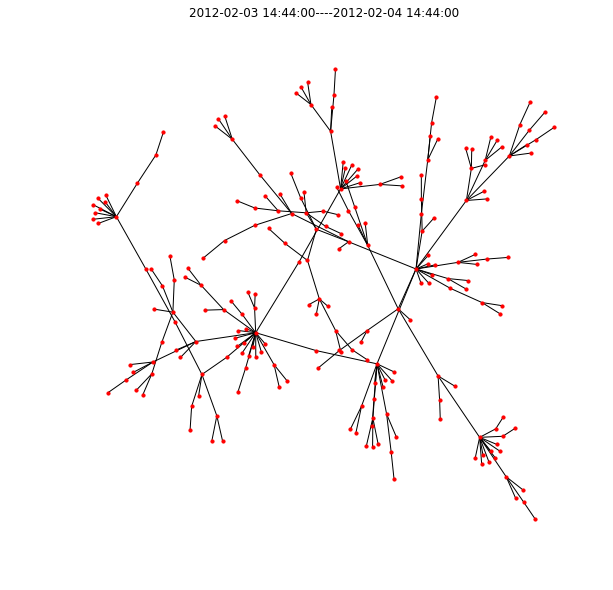

Number of nodes in graph: 226
Diameter: 18
Radius: 9


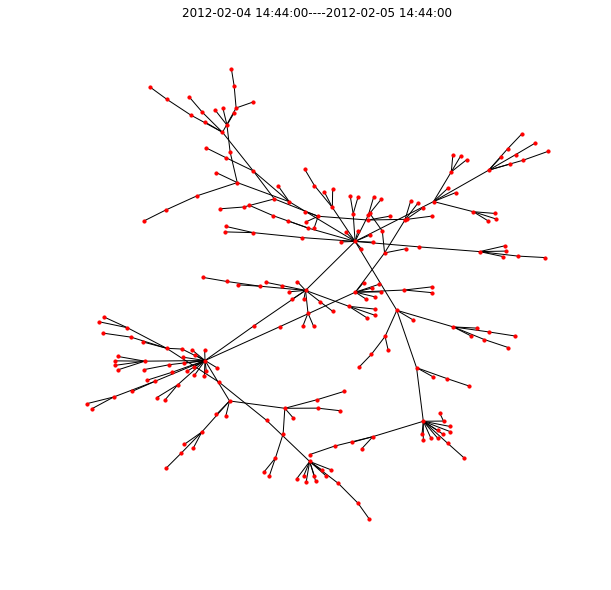

Number of nodes in graph: 234
Diameter: 18
Radius: 9


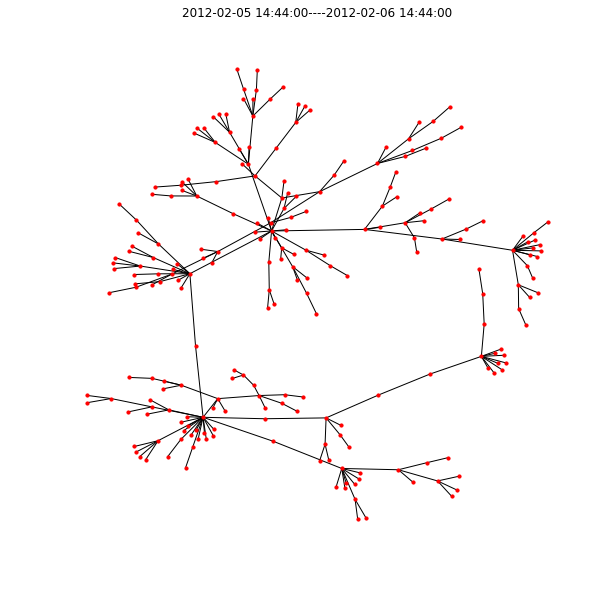

Number of nodes in graph: 234
Diameter: 18
Radius: 9


In [36]:
S=[]
d=[]
r=[]
P=nx.Graph()
for i in range(7):
    for j in range(i+1):
        P=nx.compose(P,X2[j])
    V= G1.subgraph(P)
    pos = nx.spring_layout(V)
    plt.figure(1,figsize=(10,10)) 
    nx.draw_networkx_edges(V,pos, edge_color='k',arrows=True)
    nx.draw_networkx_nodes(V,pos, node_size=10,node_color='r')
    plt.title(s1[i]+'----'+s1[i+1])
    plt.axis('off')
    plt.savefig('c5'+str(i+1)+'.png')
    plt.show()
    S.append(max(nx.connected_component_subgraphs(V),key=len))
    print("Number of nodes in graph: %d" %V.order())
    d.append(nx.diameter(S[i]))
    print("Diameter:", d[i])
    r.append(nx.radius(S[i]))                         
    print("Radius:", r[i])